In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [6]:
y = df['MEDV']
X = df.drop(columns = 'MEDV')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


#### grid search to find the optimal depth

In [24]:
clf = DecisionTreeRegressor()
grid_params = {
    'max_depth':(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
}
regressors = GridSearchCV(clf, grid_params, scoring = 'neg_mean_squared_error')
regressors.fit(X_train, y_train)
print('the best parameter for Regression Tree is : {}'.format(regressors.best_estimator_))

the best parameter for Regression Tree is : DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


In [28]:
dtree = DecisionTreeRegressor(criterion = 'mse', max_depth = 4)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

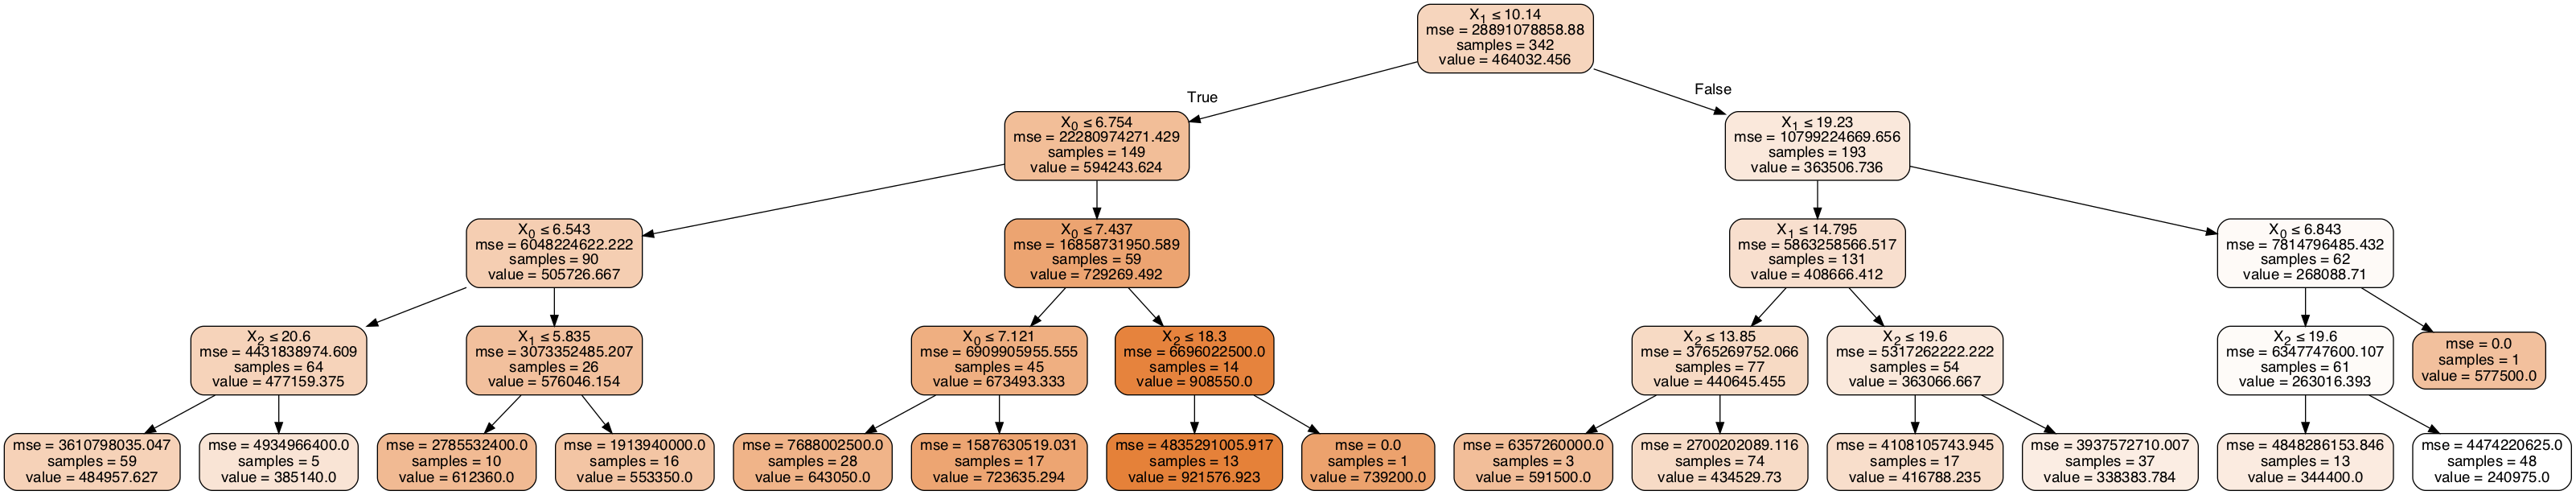

In [29]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Testing Leaf_2 (No.2 leaf from left side)

In [61]:
split_1 = X_train['LSTAT'] <= 10.14
split_2 = X_train['RM'] <= 6.754
split_3 = X_train['RM'] <= 6.543
split_4 = X_train['PTRATIO'] > 20.6
leaf_1 = X_train[split_1 & split_2 & split_3 & split_4]
print(len(leaf_1.index))
print("Mean {}".format(y_train[leaf_1.index].mean()))
print(leaf_1)

5
Mean 385140.0
        RM  LSTAT  PTRATIO
13   5.949   8.26     21.0
485  6.120   9.08     21.0
344  5.936   5.57     22.0
343  5.663   8.05     22.0
488  6.030   7.88     21.0
